In [4]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def get_section_results(file):
    eval_returns = {}
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag not in eval_returns:
                eval_returns[v.tag] = [v.simple_value]
            else:
                eval_returns[v.tag].append(v.simple_value)
    return eval_returns

In [6]:
q1_ant = get_section_results('data/q1_bc_ant_Ant-v2_15-09-2020_12-32-21/events.out.tfevents.1600198341.Aryans-MacBook-Pro.local')
q1_ant

{'Eval_AverageReturn': [1498.5616455078125],
 'Eval_StdReturn': [856.665283203125],
 'Eval_MaxReturn': [3015.87060546875],
 'Eval_MinReturn': [653.4749145507812],
 'Eval_AverageEpLen': [1000.0],
 'Train_AverageReturn': [4713.6533203125],
 'Train_StdReturn': [12.196533203125],
 'Train_MaxReturn': [4725.849609375],
 'Train_MinReturn': [4701.45654296875],
 'Train_AverageEpLen': [1000.0],
 'Train_EnvstepsSoFar': [0.0],
 'TimeSinceStart': [11.020611763000488],
 'Training_Loss': [0.03433779627084732],
 'Initial_DataCollection_AverageReturn': [4713.6533203125]}

In [8]:
q1_human = get_section_results('data/q1_bc_humanoid_Humanoid-v2_15-09-2020_13-11-53/events.out.tfevents.1600200713.Aryans-MacBook-Pro.local')
q1_human

{'Eval_AverageReturn': [312.616455078125],
 'Eval_StdReturn': [42.319190979003906],
 'Eval_MaxReturn': [457.7227783203125],
 'Eval_MinReturn': [158.72174072265625],
 'Eval_AverageEpLen': [58.707603454589844],
 'Train_AverageReturn': [10344.517578125],
 'Train_StdReturn': [20.9814453125],
 'Train_MaxReturn': [10365.4990234375],
 'Train_MinReturn': [10323.5361328125],
 'Train_AverageEpLen': [1000.0],
 'Train_EnvstepsSoFar': [0.0],
 'TimeSinceStart': [14.57296371459961],
 'Training_Loss': [0.15161572396755219],
 'Initial_DataCollection_AverageReturn': [10344.517578125]}

In [10]:
q2_ant = get_section_results('data/q2_dagger_ant_Ant-v2_15-09-2020_11-21-30/events.out.tfevents.1600194090.Aryans-MacBook-Pro.local')
pprint(q2_ant)

{'Eval_AverageEpLen': [989.8181762695312,
                       1000.0,
                       1000.0,
                       1000.0,
                       1000.0,
                       1000.0,
                       1000.0,
                       874.6666870117188,
                       1000.0,
                       1000.0,
                       1000.0,
                       1000.0,
                       923.0908813476562,
                       1000.0,
                       1000.0],
 'Eval_AverageReturn': [833.8837890625,
                        3688.373779296875,
                        4321.2314453125,
                        4459.90087890625,
                        4643.3310546875,
                        4303.25732421875,
                        4605.5185546875,
                        3999.820556640625,
                        4625.42333984375,
                        4699.07421875,
                        4694.13037109375,
                        4559.26416015625,
   

In [11]:
q2_human = get_section_results('data/q2_dagger_human_Humanoid-v2_15-09-2020_11-09-07/events.out.tfevents.1600193347.Aryans-MacBook-Pro.local')
pprint(q2_human)

{'Eval_AverageEpLen': [66.01973724365234,
                       49.93532180786133,
                       57.72413635253906,
                       57.568965911865234,
                       60.83030319213867,
                       63.70252990722656,
                       67.0,
                       86.22413635253906,
                       91.93578338623047,
                       85.18643951416016,
                       104.73958587646484,
                       103.71134185791016,
                       107.83870697021484,
                       124.8024673461914,
                       135.82432556152344],
 'Eval_AverageReturn': [348.37060546875,
                        274.158203125,
                        315.9384765625,
                        320.8929138183594,
                        344.3800964355469,
                        370.1205139160156,
                        395.5533142089844,
                        542.3609619140625,
                        598.370361328125,


Text(0, 0.5, 'Return')

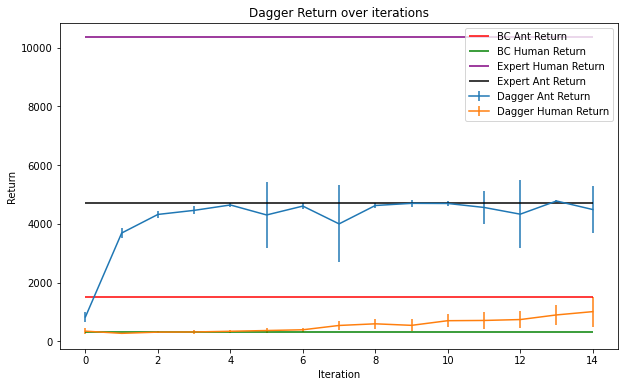

In [22]:
q2_ant_return = q2_ant['Eval_AverageReturn']
q2_ant_std = q2_ant['Eval_StdReturn']
q2_human_return = q2_human['Eval_AverageReturn']
q2_human_std = q2_human['Eval_StdReturn']
x = np.arange(len(q2_ant_return))
plt.figure(figsize=(10, 6))
plt.errorbar(x, q2_ant_return, yerr=q2_ant_std, label = 'Dagger Ant Return')
plt.errorbar(x, q2_human_return, q2_human_std, label = 'Dagger Human Return')
plt.hlines(q1_ant['Eval_AverageReturn'][0], 0, 14, label='BC Ant Return', color = 'r')
plt.hlines(q1_human['Eval_AverageReturn'][0], 0, 14, label='BC Human Return', color = 'g')
plt.hlines(q1_human['Train_AverageReturn'][0], 0, 14, label='Expert Human Return', color = 'purple')
plt.hlines(q1_ant['Train_AverageReturn'][0], 0, 14, label='Expert Ant Return')

plt.legend()
plt.title("Dagger Return over iterations")
plt.xlabel("Iteration")
plt.ylabel('Return')

Text(0.5, 1.0, 'Average Return over Hyperameter value')

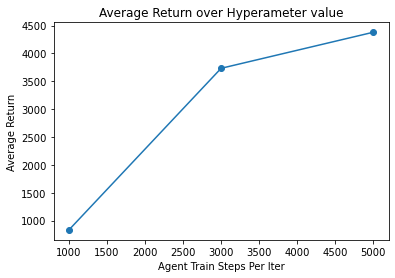

In [16]:
one = get_section_results('data/q1_bc_ant_1000_Ant-v2_15-09-2020_11-02-49/events.out.tfevents.1600192969.Aryans-MacBook-Pro.local')['Eval_AverageReturn']
two = get_section_results('data/q1_bc_ant_3000_Ant-v2_15-09-2020_11-02-18/events.out.tfevents.1600192938.Aryans-MacBook-Pro.local')['Eval_AverageReturn']
three = get_section_results('data/q1_bc_ant_5000_Ant-v2_15-09-2020_11-01-39/events.out.tfevents.1600192899.Aryans-MacBook-Pro.local')['Eval_AverageReturn']

plt.plot([1000, 3000, 5000], [one, two, three])
plt.scatter([1000, 3000, 5000], [one, two, three])
plt.xlabel('Agent Train Steps Per Iter')
plt.ylabel('Average Return')
plt.title('Average Return over Hyperameter value')